In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

'''Create dataset of colors (24 data points with each having 3 dimensions)'''
colors = np.array([[0,255,255], [205,92,92], [255,255,0], [0,0,205], [250,250,210], [0,100,0], [255,69,0], [255,20,147], [65,105,225], [46,139,87], [250,128,114], [178,34,34], [0,206,209], [50,205,50], [25,25,112], [255,0,255], [255,248,220], [0,0,128], [30,144,255], [139,0,0], [107,142,35], [70,130,180], [165,42,42], [95,158,160]])

names_of_colors = ['aqua', 'indian red', 'yellow', 'medium blue', 'light golden rod yellow', 'dark green', 'orange red', 'deep pink', 'royal blue', 'sea green', 'salmon', 'firebrick', 'dark turquoise', 'lime green', 'midnight blue', 'magenta', 'corn silk', 'navy', 'dodger blue', 'dark red', 'olive drab', 'steel blue', 'brown', 'cadet blue']

'''Calibrate the color values to be between 0 & 1'''
colors = colors/255

'''Create a 100x100 output grid with coordinates to every node'''
op_grid = np.array([(i, j) for i in range(100) for j in range(100)])

In [2]:
'''Sigma and learning rate decay'''
def change_learning_rate(lr, k, T):
    return lr * np.exp(-k/T) 
    
def change_sigma(sig, k, T):
    return sig * np.exp(-k/T)

In [3]:
def calc_distance(inp_x, old_weights):
    '''Calculate distance between KSOM nodes and the input'''
    norm = np.linalg.norm(old_weights - inp_x, axis=2)
    return norm

In [4]:
def get_winner_node(inp_x, old_weights):
    dist = calc_distance(inp_x, old_weights)
    node = np.argmin(dist)
    '''Find the index of the node closest to the input'''
    min_distance_node_indices = np.unravel_index(node, dist.shape)
    return min_distance_node_indices

In [5]:
def change_weights(lr, inp_x, old_weights,sig):
    new_weights = np.copy(old_weights)
    winner_node = get_winner_node(inp_x, old_weights)
    for i in range(100):
        for j in range(100):
            d = math.sqrt(sum([(x - y) ** 2 for x, y in zip(winner_node, [i, j])]))
            h = np.exp(-1*(d**2)/(2 * (sig**2)))
            '''Apply weight updates to neighbours'''
            new_weights[i][j] = old_weights[i][j] + (lr*h*(inp_x - old_weights[i][j]))
    return new_weights

In [6]:
def run(sigma0):
    np.random.seed(1);
    weights = np.empty([100,100,3])

    for i in range(0, 100):
        for j in range(0, 100):
            weights[i][j][0] = random.randint(0,255)/255
            weights[i][j][1] = random.randint(0,255)/255
            weights[i][j][2] = random.randint(0,255)/255

    T = 1001
    lr = 0.8
    sigma = sigma0
    
    epoch_weights = []

    for epoch in range(1, T):
        '''Select a random data point'''
        ds = random.randint(0, 23)
        '''Feed the point to the map'''
        weights = change_weights(lr, colors[ds], weights, sigma)
        
        '''Update learning rate and sigma over epochs'''
        lr = change_learning_rate(0.8, epoch, T)
        sigma = change_sigma(sigma0, epoch, T)
        
        '''Copying weights to graph later'''
        if epoch == 20:
            epoch_weights.append(weights.copy())

        if epoch == 40:
            epoch_weights.append(weights.copy())

        if epoch == 100:
            epoch_weights.append(weights.copy())

        if epoch == 1000:
            epoch_weights.append(weights.copy())


    return epoch_weights

In [7]:
def plot_graphs(epoch_weights, sigma):
    w_20 = epoch_weights[0]
    w_40 = epoch_weights[1]
    w_100 = epoch_weights[2]
    w_1000 = epoch_weights[3]

    plt.figure(figsize=(10, 10))
    plt.subplot(221)
    plt.title('epoch=20')
    plt.imshow(w_20)
    plt.subplot(222)
    plt.title('epoch=40')
    plt.imshow(w_40)
    plt.subplot(223)
    plt.title('epoch=100')
    plt.imshow(w_100)
    plt.subplot(224)
    plt.title('epoch=1000')
    plt.imshow(w_1000)
    plt.suptitle('Sigma0 = '+str(sigma))
    plt.show()  # Display the plot


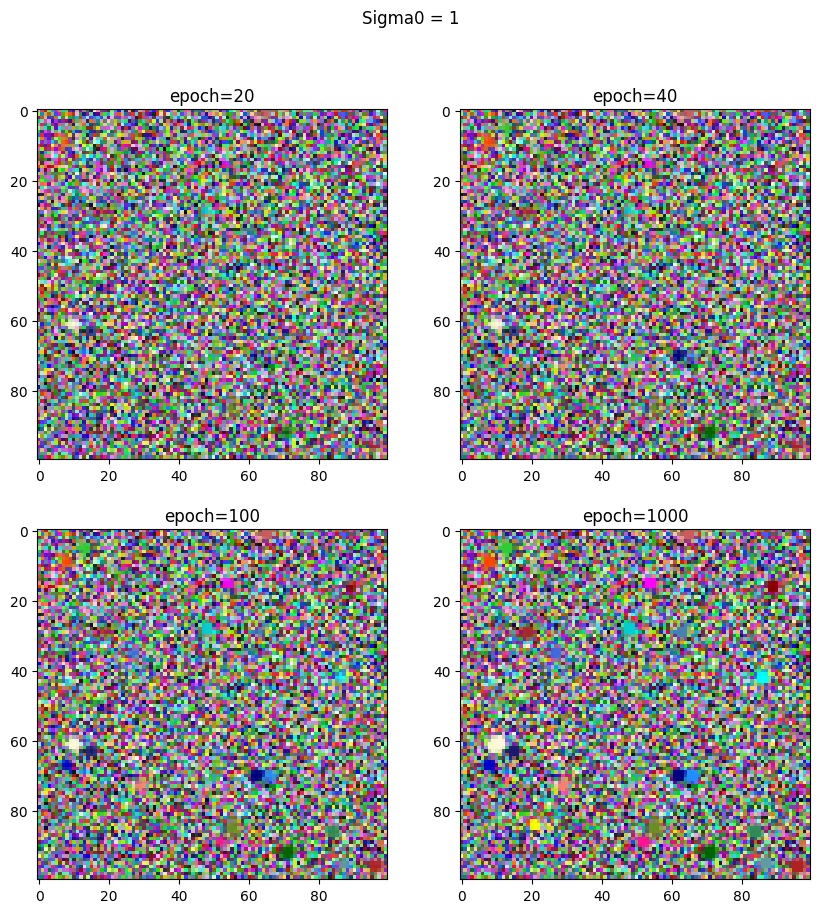

In [8]:
'''For sigma0 = 1'''
epoch_weights = run(1)
plot_graphs(epoch_weights, 1)

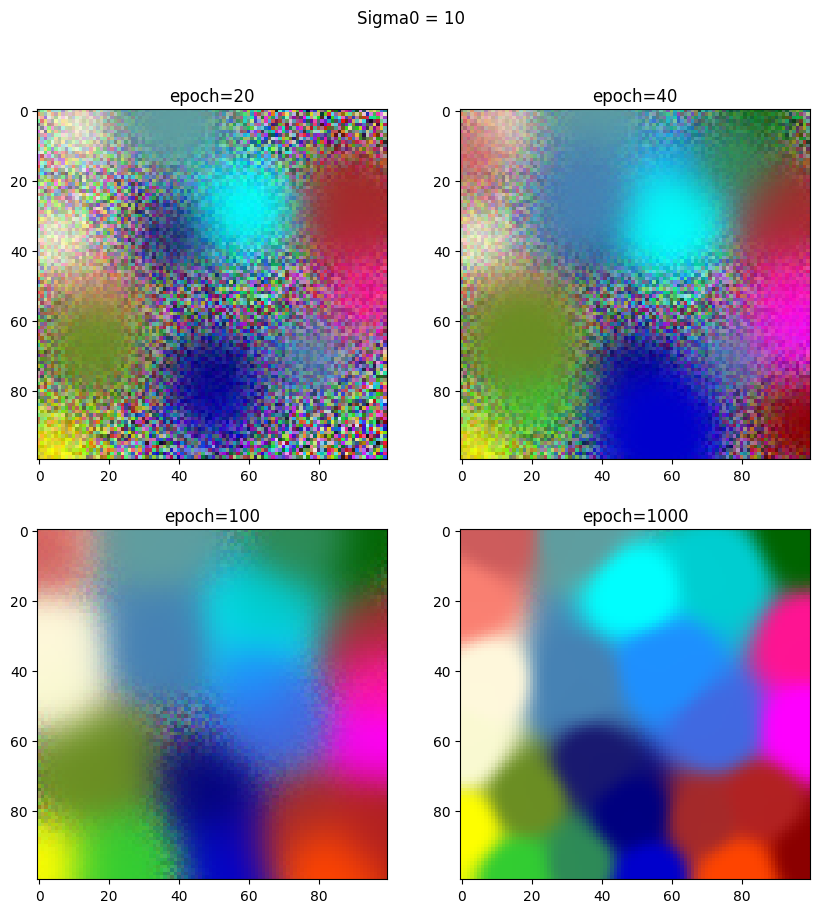

In [9]:
'''For sigma0 = 10'''
epoch_weights = run(10)
plot_graphs(epoch_weights, 10)

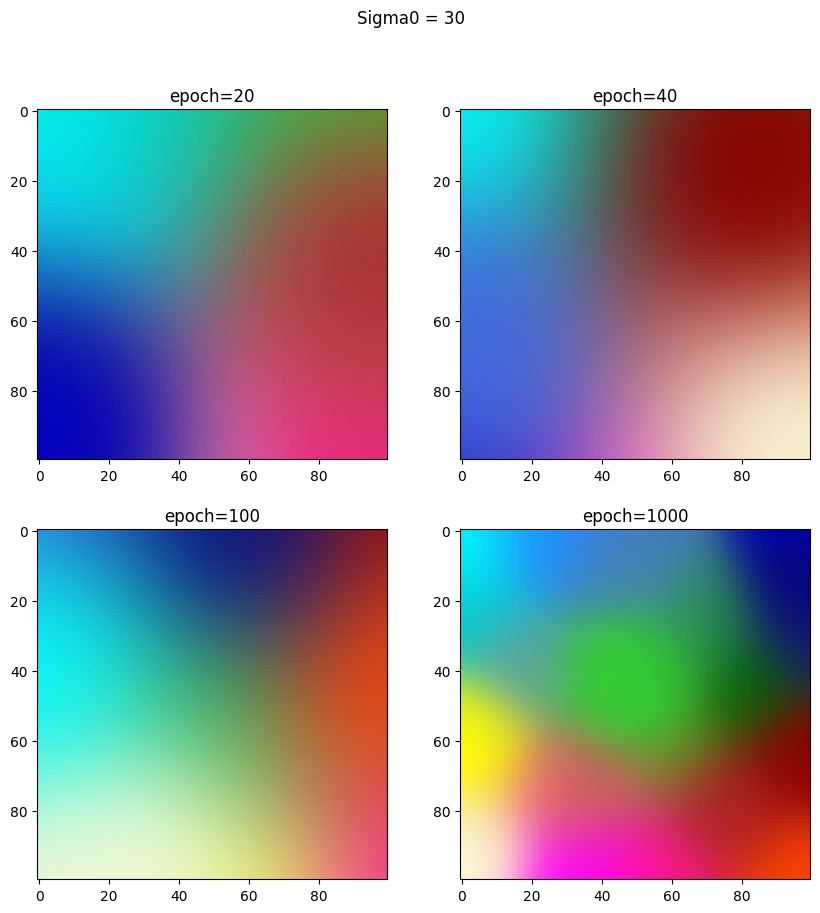

In [10]:
'''For sigma0 = 30'''
epoch_weights = run(30)
plot_graphs(epoch_weights, 30)

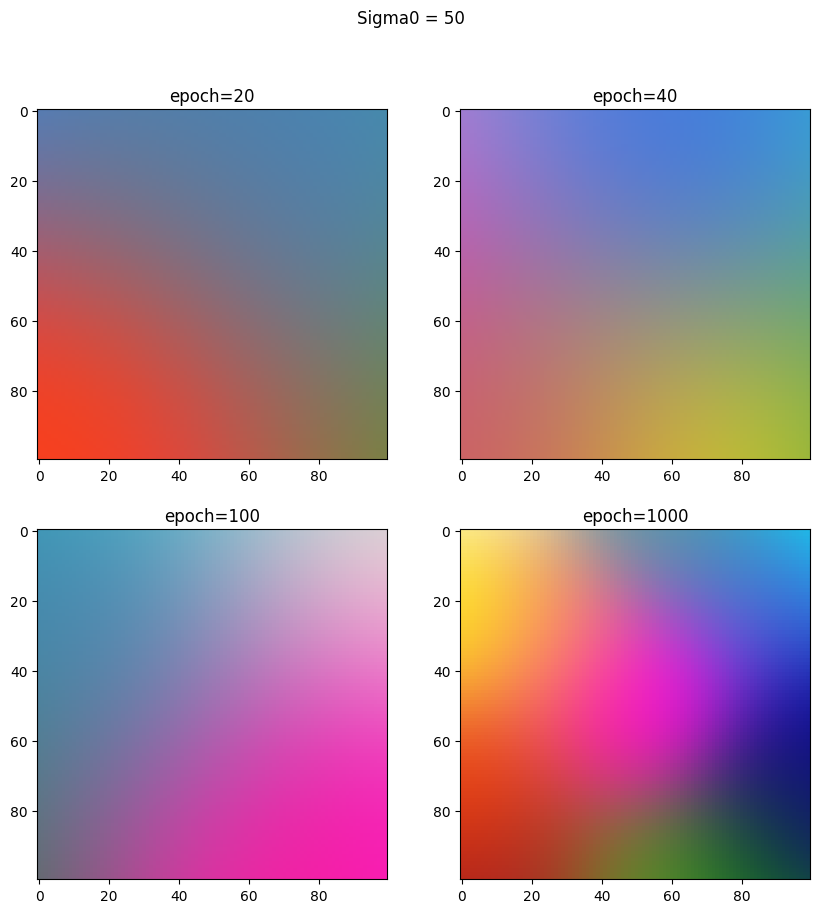

In [11]:
'''For sigma0 = 50'''
epoch_weights = run(50)
plot_graphs(epoch_weights, 50)

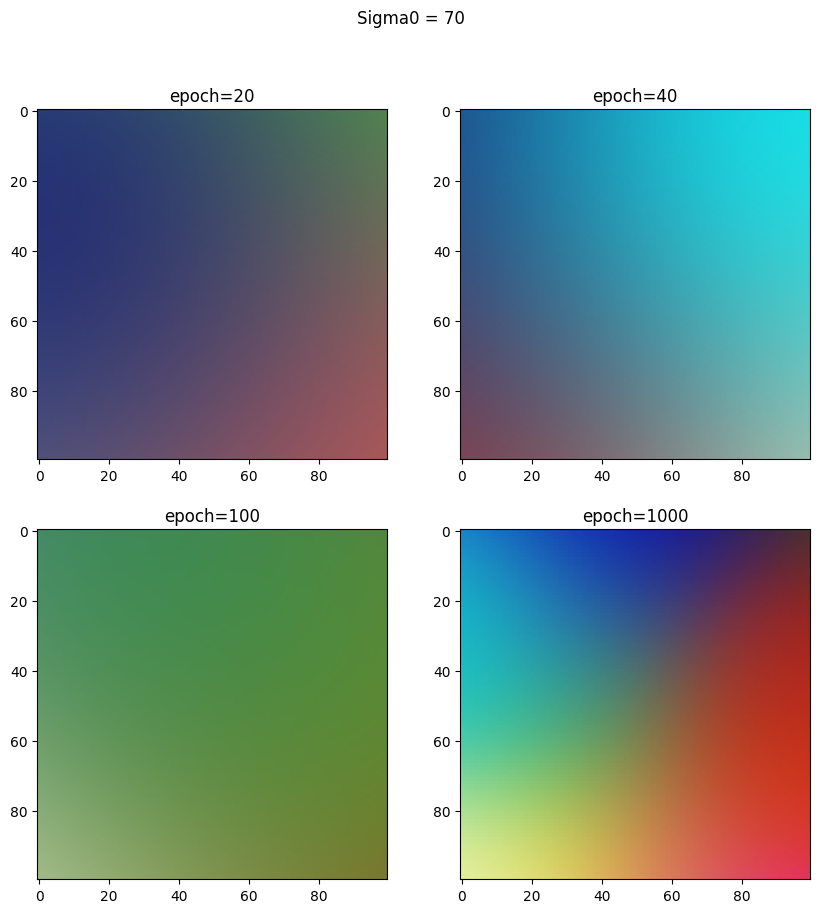

In [12]:
'''For sigma0 = 70'''
epoch_weights = run(70)
plot_graphs(epoch_weights, 70)

# Conclusion - 
#### Varying sigma0 from smaller to larger values:
1. Sigma value is directly proportional to the influence of winning node over it's neighbours.
2. With smaller sigma, neighboring neurons have less influence by the winning neuron(winner takes all type of update) during the learning process. This leads to a sharper distinction between different colors in the map, resulting in clearer boundaries. While in case of larger sigmas the disctinctions is less sharp with fading boundaries.
3. Each neuron will represent a specific color more precisely, and there will be less blending or overlap of colors   across neighboring neurons. When sigma increases overlap is increases and neighbouring colours blend more.

#### Sigma decay over epochs:
1. Over 1000 epochs value of sigma decrease to approximately 35% of the inital value. As sigma decreases, the influence radius narrows, and the updates become more localized to the immediate neighbors of the winning node.
2. It results in creating sharper boundaries and more distinct clusters within the KSOM and contributes towards convergence of the map.